# Processing of the methylation array data

## Raw IDAT files
The idat files originally came renamed, such that the filenames were sample
names. However, that messes with preprocessing. So I renamed them back using

```
   python rename.py
```

Next, using the `methylsuite` we performed the preprocessing itself:
```
   python -m methylprep -v process -d . --no_sample_sheet --all 
```

Data files are stored on figshare

## QC and analysis
Using `methylcheck` and then `methylize` was done in the
`../notebooks/methylation.ipynb`

## RMS data from Clay et al

### Download
[https://www.nature.com/articles/s41598-021-01649-w#data-availability]
[https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE167059]

run `get_data.sh` in the `../data/clay` directory.


 -Marvin (1/25/2024)


In [1]:
import methylcheck
#from itables import init_notebook_mode
#init_notebook_mode(all_interactive=True)

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

import pandas as pd

In [2]:
rename = pd.read_csv('../data/rename.csv')
sample_lkup = rename.set_index('txt_idat').to_dict()['sample']
sample_lkup

{'206702460106_R03C01': 'Be13',
 '206702460106_R04C01': 'Be14',
 '204391650049_R08C01': 'X1',
 '204391650049_R05C01': 'X16',
 '204391650050_R06C01': 'Ic104',
 '204391650050_R02C01': 'Ic29',
 '204391650050_R03C01': 'Ic35',
 '206702460100_R06C01': 'R410',
 '204391650050_R01C01': 'ZH3'}

In [3]:
df, meta = methylcheck.load_both("../data")

Files:   0%|          | 0/1 [00:00<?, ?it/s]

Files: 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]
INFO:methylcheck.load_processed:loaded data (865859, 9) from 1 pickled files (0.216s)
INFO:methylcheck.load_processed:Transposed data and reordered meta_data so sample ordering matches.
INFO:methylcheck.load_processed:meta.Sample_IDs match data.index (OK)


In [4]:
df = df.rename(columns=sample_lkup)

In [5]:
df

,X16,X1,ZH3,Ic29,Ic35,Ic104,R410,Be13,Be14
IlmnID,,,,,,,,,
cg00000029,0.922,0.910,0.921,0.898,0.844,0.870,0.935,0.796,0.918
cg00000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,0.930,0.926,0.933,0.921,0.939,0.938,0.938,0.919,0.935
cg00000155,0.961,0.961,0.953,0.954,0.953,0.952,0.951,0.947,0.947
cg00000158,0.961,0.959,0.962,0.967,0.960,0.963,0.964,0.955,0.958
...,...,...,...,...,...,...,...,...,...
ch.X.97129969R,0.133,NaN,0.065,0.071,NaN,0.103,NaN,NaN,0.084
ch.X.97133160R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.97651759F,0.064,0.070,0.054,0.051,0.169,0.063,0.074,0.061,0.050


In [6]:
meta['Sample_Name'] = meta['Sample_ID'].apply(lambda x: sample_lkup.get(x, x))
meta

,Sentrix_ID,Sentrix_Position,Sample_Group,Sample_Name,Sample_Plate,Sample_Type,Sub_Type,Sample_Well,Pool_ID,GSM_ID,Control,Sample_ID
6,204391650049,R05C01,None,X16,None,Unknown,None,None,None,,False,204391650049_R05C01
8,204391650049,R08C01,None,X1,None,Unknown,None,None,None,,False,204391650049_R08C01
4,204391650050,R01C01,None,ZH3,None,Unknown,None,None,None,,False,204391650050_R01C01
7,204391650050,R02C01,None,Ic29,None,Unknown,None,None,None,,False,204391650050_R02C01
3,204391650050,R03C01,None,Ic35,None,Unknown,None,None,None,,False,204391650050_R03C01
5,204391650050,R06C01,None,Ic104,None,Unknown,None,None,None,,False,204391650050_R06C01
2,206702460100,R06C01,None,R410,None,Unknown,None,None,None,,False,206702460100_R06C01
1,206702460106,R03C01,None,Be13,None,Unknown,None,None,None,,False,206702460106_R03C01
0,206702460106,R04C01,None,Be14,None,Unknown,None,None,None,,False,206702460106_R04C01


## Load the Clay et al data for comparison

In [7]:
df_clay = pd.read_csv('../data/clay/GSE167059_series_matrix.txt.gz', sep='\t', comment='!')

In [8]:
df_clay

,ID_REF,GSM5091514,GSM5091515,GSM5091516,GSM5091517,GSM5091518,GSM5091519,GSM5091520,GSM5091521,GSM5091522,...,GSM5091819,GSM5091820,GSM5091827,GSM5091828,GSM5091829,GSM5091830,GSM5091831,GSM5091832,GSM5091833,GSM5091834
0,cg00000029,0.458096,0.436862,0.557464,0.273908,0.268999,0.464047,0.296134,0.601238,0.638230,...,0.214420,0.658777,0.302270,0.264199,0.292596,0.322450,0.321492,0.330437,0.297751,0.281272
1,cg00000109,0.784748,0.672462,0.709131,0.764051,0.735903,0.802067,0.757349,0.822185,0.729125,...,0.713502,0.899415,0.882472,0.865555,0.891414,0.864515,0.896941,0.874916,0.757973,0.878876
2,cg00000155,0.898920,0.910976,0.882063,0.897799,0.864207,0.877782,0.898634,0.898826,0.888908,...,0.911682,0.892609,0.916578,0.897084,0.928383,0.913734,0.930129,0.904493,0.913108,0.907956
3,cg00000158,0.922142,0.912655,0.921988,0.923230,0.857839,0.918672,0.909844,0.917447,0.902871,...,0.913351,0.686652,0.935609,0.942077,0.924971,0.949124,0.925263,0.942601,0.927053,0.939235
4,cg00000165,0.073302,0.418749,0.097351,0.343926,0.201264,0.492900,0.100729,0.244061,0.158709,...,0.081691,0.193345,0.107970,0.132986,0.278925,0.414262,0.257388,0.103265,0.479247,0.722267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785117,ch.9.98463211R,0.030049,0.037570,0.034985,0.033525,0.034283,0.030148,0.034415,0.021292,0.031773,...,0.029086,0.084644,0.027622,0.024821,0.030712,0.029026,0.020561,0.021882,0.015731,0.019425
785118,ch.9.98937537R,0.021340,0.030653,0.060031,0.029832,0.029342,0.026719,0.033379,0.043369,0.022329,...,0.026260,0.079041,0.032402,0.032264,0.034478,0.026196,0.024117,0.022221,0.021394,0.022173
785119,ch.9.98957343R,0.063361,0.076488,0.058896,0.065814,0.115131,0.063239,0.065663,0.042883,0.087229,...,0.071109,0.113069,0.081383,0.066054,0.167663,0.075272,0.123683,0.100317,0.063315,0.073047
785120,ch.9.98959675F,0.153406,0.177152,0.165363,0.159144,0.300897,0.142211,0.136739,0.140873,0.145625,...,0.153285,0.479130,0.165010,0.132802,0.255161,0.186805,0.197302,0.202488,0.216349,0.144947


In [9]:
meta_clay = pd.read_excel('../data/clay/41598_2021_1649_MOESM1_ESM.xls')

In [10]:
meta_clay

,Sample_ID,Sequencing_ID,Sentrix.ID,Clinical.Dx,Dx.Category.Histology,Reason.Uncertain,Meth.group,FOXO1.FISH,Fusion,Gender,...,RNA.seq,WES,Age.at.time.of.diagnosis.yrs,Age.at.time.of.sample.yrs,Pre.treated.sample.chemo.within.last.month,Outcome,Time.to.census.point,Primary.or.met,Diagnostic.or.recurrence,Recurrence.number
0,Sample107,RMS016,201533640009_R08C01,Alveolar rhabdomyosarcoma,ARMS,NaN,ARMS,NaN,NaN,Male,...,NaN,Y,16.0,16.0,No,NaN,NaN,Primary,Diagnostic,NaN
1,Sample96,RMS018,201533620059_R01C01,"Rhabdomyosarcoma, alveolar subtype, solid variant",ARMS,NaN,ARMS,NaN,NaN,Female,...,NaN,Y,13.0,13.0,No,NaN,NaN,Primary,Diagnostic,NaN
2,Sample13,NaN,201172580053_R05C01,Alveolar rhabdomyosarcoma,ARMS,NaN,ARMS,Positive,NaN,Male,...,NaN,NaN,12.0,12.0,No,DECEASED,657.0,Primary,Diagnostic,NaN
3,Sample115,NaN,201533640023_R08C01,Metastatic alveolar rhabdomyosarcoma,ARMS,NaN,ARMS,Positive,NaN,Male,...,NaN,NaN,12.0,12.0,No,NaN,NaN,Met,Diagnostic,NaN
4,Sample01,NaN,201172580047_R01C01,Alveolar rhabdomyosarcoma,ARMS,NaN,ARMS,Positive,NaN,Male,...,NaN,NaN,14.0,14.0,No,NaN,NaN,Primary,Recurrence,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Sample46,RMS107,201533520001_R04C01,"Rhabdomyosarcoma, mostly spindle cell cell var...","RMS, NOS",Pattern not classic,SC/SRMS,NaN,NaN,Female,...,NaN,NaN,15.0,15.0,No,NaN,NaN,Primary,Diagnostic,NaN
154,Sample56,RMS108,201533520026_R07C01,"Embryonal rhabdomyosarcoma, spindle cell variant","RMS, NOS",Pattern not classic,SC/SRMS,NaN,NaN,Male,...,Y,NaN,2.0,2.0,No,NaN,NaN,Primary,Diagnostic,NaN
155,Sample127,RMS109,201533640031_R05C01,"Rhabdomyosarcoma, sample too small to subtype","RMS, NOS",Small sample,SC/SRMS,NaN,NaN,Male,...,Y,NaN,17.0,17.0,No,NaN,NaN,Primary,Diagnostic,NaN
156,Sample14,NaN,201172580053_R06C01,"Rhabdomyosarcoma, sclerosing/spindle cell variant",SC/SRMS,NaN,SC/SRMS,NaN,NaN,Male,...,NaN,NaN,15.0,15.0,Yes,NaN,NaN,Primary,Diagnostic,NaN


## linking GSM with samples to get the RMS metadata

In [11]:
df_link = pd.DataFrame({
    'id' : [x.strip().replace('"','') for x in open("../data/clay/sample_ids.txt") if len(x) > 2],
    'sample' : [x.strip().replace('"','') for x in open("../data/clay/sample_titles.txt")]
}).set_index('id')

df_link
                        

,sample
id,
GSM5091514,201172580047_R01C01
GSM5091515,201172580047_R02C01
GSM5091516,201172580047_R03C01
GSM5091517,201172580047_R04C01
GSM5091518,201172580047_R05C01
...,...
GSM5091830,202292330029_R04C01
GSM5091831,202292330029_R05C01
GSM5091832,202292330029_R06C01


In [12]:
df_clay = df_clay.rename(columns=df_link['sample'].to_dict())

In [13]:
clay_group = meta_clay[['Sentrix.ID', 'Meth.group']].set_index('Sentrix.ID')

## Combined analysis of Clay et al data with our own

In [14]:
df_combined = pd.concat([df, df_clay.set_index('ID_REF')], axis=1)

In [15]:
df_combined

,X16,X1,ZH3,Ic29,Ic35,Ic104,R410,Be13,Be14,201172580047_R01C01,...,201533640050_R08C01,202163550088_R03C01,202292330029_R01C01,202292330029_R02C01,202292330029_R03C01,202292330029_R04C01,202292330029_R05C01,202292330029_R06C01,202292330029_R07C01,202292330029_R08C01
cg00000029,0.922,0.910,0.921,0.898,0.844,0.870,0.935,0.796,0.918,0.458096,...,0.214420,0.658777,0.302270,0.264199,0.292596,0.322450,0.321492,0.330437,0.297751,0.281272
cg00000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,0.930,0.926,0.933,0.921,0.939,0.938,0.938,0.919,0.935,0.784748,...,0.713502,0.899415,0.882472,0.865555,0.891414,0.864515,0.896941,0.874916,0.757973,0.878876
cg00000155,0.961,0.961,0.953,0.954,0.953,0.952,0.951,0.947,0.947,0.898920,...,0.911682,0.892609,0.916578,0.897084,0.928383,0.913734,0.930129,0.904493,0.913108,0.907956
cg00000158,0.961,0.959,0.962,0.967,0.960,0.963,0.964,0.955,0.958,0.922142,...,0.913351,0.686652,0.935609,0.942077,0.924971,0.949124,0.925263,0.942601,0.927053,0.939235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.97129969R,0.133,NaN,0.065,0.071,NaN,0.103,NaN,NaN,0.084,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.97133160R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.97651759F,0.064,0.070,0.054,0.051,0.169,0.063,0.074,0.061,0.050,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.97737721F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# leave criteria undefined to list all problem probes for that array type
sketchy_probes_list = methylcheck.list_problem_probes(array='epic')
len(sketchy_probes_list)

389050

In [17]:
excluded_df = methylcheck.exclude_probes(df_combined, sketchy_probes_list)
excluded_df

Of 865859 probes, 388628 matched, yielding 477231 probes after filtering.


,X16,X1,ZH3,Ic29,Ic35,Ic104,R410,Be13,Be14,201172580047_R01C01,...,201533640050_R08C01,202163550088_R03C01,202292330029_R01C01,202292330029_R02C01,202292330029_R03C01,202292330029_R04C01,202292330029_R05C01,202292330029_R06C01,202292330029_R07C01,202292330029_R08C01
cg00000029,0.922,0.910,0.921,0.898,0.844,0.870,0.935,0.796,0.918,0.458096,...,0.214420,0.658777,0.302270,0.264199,0.292596,0.322450,0.321492,0.330437,0.297751,0.281272
cg00000109,0.930,0.926,0.933,0.921,0.939,0.938,0.938,0.919,0.935,0.784748,...,0.713502,0.899415,0.882472,0.865555,0.891414,0.864515,0.896941,0.874916,0.757973,0.878876
cg00000165,0.942,0.950,0.364,0.720,0.952,0.539,0.952,0.793,0.884,0.073302,...,0.081691,0.193345,0.107970,0.132986,0.278925,0.414262,0.257388,0.103265,0.479247,0.722267
cg00000221,0.927,0.934,0.919,0.917,0.916,0.917,0.909,0.896,0.922,0.366758,...,0.761879,0.386984,0.356959,0.759021,0.504411,0.237101,0.415958,0.621031,0.400594,0.720435
cg00000236,0.794,0.697,0.933,0.935,0.945,0.909,0.905,0.929,0.888,0.489202,...,0.778547,0.556443,0.902358,0.873940,0.835041,0.893551,0.858220,0.896323,0.813147,0.869479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.881064F,0.112,0.108,0.065,0.063,NaN,0.064,NaN,0.095,0.077,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.92435715F,0.108,0.048,0.089,0.077,0.089,0.048,0.088,0.086,0.075,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.92543860F,0.054,0.033,0.053,0.045,0.068,0.060,0.061,0.057,0.048,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.938089F,0.054,0.054,0.077,0.054,0.082,0.049,0.073,0.056,0.054,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#methylcheck.beta_density_plot(excluded_df)

In [19]:
#methylcheck.mean_beta_compare(df, excluded_df)

In [20]:
filtered_df = methylcheck.exclude_sex_control_probes(excluded_df, 'epic', no_sex=True, no_control=True, verbose=True)


epic: Removed 12360 sex-linked probes from 167 samples. 464871 probes remaining.


In [21]:
#methylcheck.beta_density_plot(filtered_df)

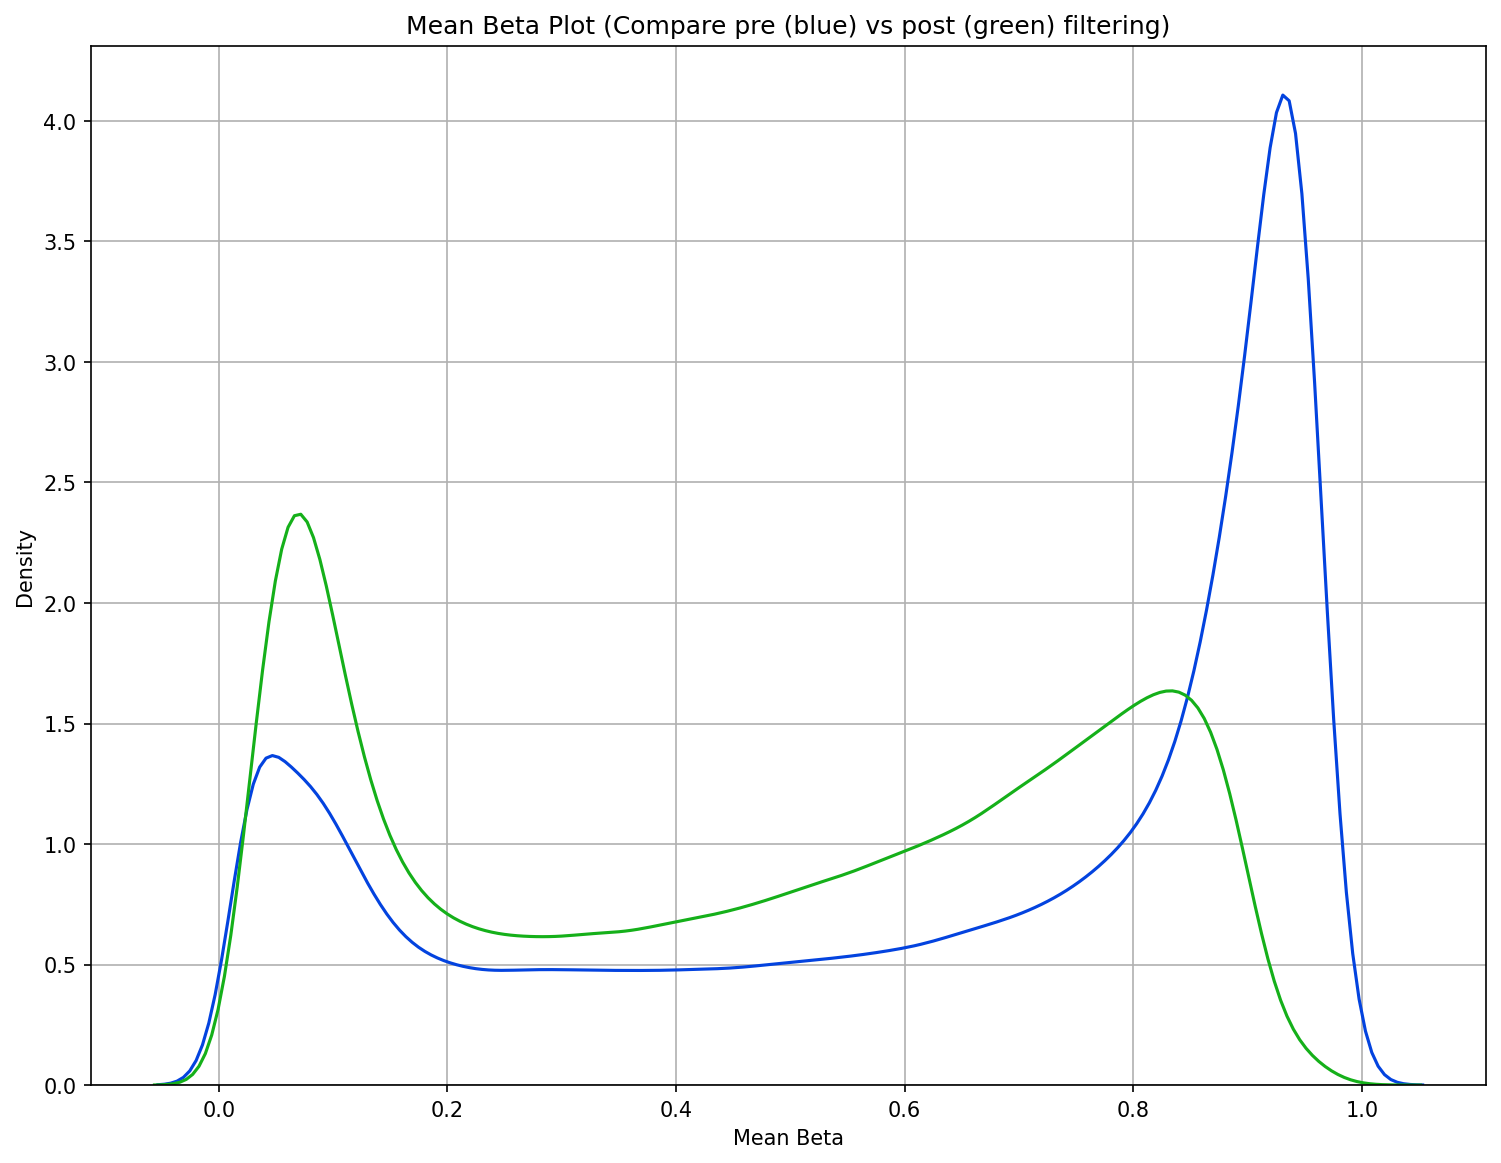

In [22]:
methylcheck.mean_beta_compare(df, filtered_df)

In [23]:
#JQ1_good = ['X1', 'Ic104', 'R410']
#comb_good = ['Be10', 'ZH3']
#response_labels = {}
#response_codes = {}
#for sample in filtered_df.columns:
#    resp = 'BAD'
#    code = 0
#    if sample in JQ1_good:
#        resp = 'COMB' #'JQ1_COMB'
#        code = 2
#    if sample in comb_good:
#        resp = 'COMB'
#        code = 1
#    
#    response_labels[sample] = resp
#    response_codes[sample] = code


## PCA plot

In [24]:
filtered_df

,X16,X1,ZH3,Ic29,Ic35,Ic104,R410,Be13,Be14,201172580047_R01C01,...,201533640050_R08C01,202163550088_R03C01,202292330029_R01C01,202292330029_R02C01,202292330029_R03C01,202292330029_R04C01,202292330029_R05C01,202292330029_R06C01,202292330029_R07C01,202292330029_R08C01
cg00000029,0.922,0.910,0.921,0.898,0.844,0.870,0.935,0.796,0.918,0.458096,...,0.214420,0.658777,0.302270,0.264199,0.292596,0.322450,0.321492,0.330437,0.297751,0.281272
cg00000109,0.930,0.926,0.933,0.921,0.939,0.938,0.938,0.919,0.935,0.784748,...,0.713502,0.899415,0.882472,0.865555,0.891414,0.864515,0.896941,0.874916,0.757973,0.878876
cg00000165,0.942,0.950,0.364,0.720,0.952,0.539,0.952,0.793,0.884,0.073302,...,0.081691,0.193345,0.107970,0.132986,0.278925,0.414262,0.257388,0.103265,0.479247,0.722267
cg00000221,0.927,0.934,0.919,0.917,0.916,0.917,0.909,0.896,0.922,0.366758,...,0.761879,0.386984,0.356959,0.759021,0.504411,0.237101,0.415958,0.621031,0.400594,0.720435
cg00000236,0.794,0.697,0.933,0.935,0.945,0.909,0.905,0.929,0.888,0.489202,...,0.778547,0.556443,0.902358,0.873940,0.835041,0.893551,0.858220,0.896323,0.813147,0.869479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.9.84078312F,0.052,0.044,0.052,0.062,0.069,0.053,0.040,0.050,0.055,0.057954,...,0.049554,0.144522,0.071011,0.041555,0.051693,0.040156,0.039883,0.070617,0.028627,0.028896
ch.9.86947500F,0.057,0.045,0.059,0.056,0.059,0.050,0.052,0.051,0.058,0.043599,...,0.051401,0.176752,0.041589,0.036457,0.102788,0.047075,0.048790,0.051360,0.048564,0.045673
ch.9.88862796F,0.048,0.033,0.072,0.054,0.060,0.071,0.045,0.064,0.060,0.035055,...,0.031687,0.058179,0.022663,0.031046,0.056130,0.029955,0.032607,0.033280,0.023597,0.020768
ch.9.90287778F,0.052,0.067,0.046,0.053,0.051,0.046,0.045,0.055,0.062,0.046494,...,0.043453,0.098022,0.068168,0.037799,0.187868,0.039352,0.058340,0.060434,0.038088,0.040609


In [25]:
not_na_probes = ~filtered_df.isna().any(axis=1)

In [26]:
import scanpy as sc
adata = sc.AnnData(X=filtered_df.loc[not_na_probes].T)

In [27]:
adata.obs['group'] = clay_group

In [30]:
adata.obs['group'].fillna('EPICYCLE', inplace=True)

In [31]:
import numpy as np
iqr = np.percentile(adata.X, [25, 75], axis=0)

In [32]:
iqr = np.array(iqr)
iqr = iqr[1] - iqr[0]
iqr

array([0.21427454, 0.08216282, 0.46188632, ..., 0.01829893, 0.02495959,
       0.07743882])

In [33]:
iqr.shape

(425422,)

In [34]:
most_variable_idx = np.argsort(iqr)[::-1]

(array([1.3920e+04, 2.2149e+04, 2.8957e+04, 2.8774e+04, 2.4394e+04,
        1.9782e+04, 1.6423e+04, 1.3915e+04, 1.2245e+04, 1.1054e+04,
        9.9760e+03, 9.0240e+03, 8.5300e+03, 8.2150e+03, 7.8540e+03,
        7.6690e+03, 7.3110e+03, 7.2950e+03, 7.3460e+03, 7.3530e+03,
        7.2200e+03, 7.1210e+03, 6.9490e+03, 6.9490e+03, 6.8070e+03,
        6.7120e+03, 6.3180e+03, 6.4490e+03, 6.0990e+03, 5.9530e+03,
        5.6590e+03, 5.3890e+03, 5.3870e+03, 5.0640e+03, 4.9980e+03,
        4.7380e+03, 4.3670e+03, 4.1600e+03, 3.8440e+03, 3.7420e+03,
        3.4490e+03, 3.1490e+03, 3.0160e+03, 2.8150e+03, 2.4580e+03,
        2.3920e+03, 2.1480e+03, 1.9400e+03, 1.7790e+03, 1.5380e+03,
        1.4820e+03, 1.2500e+03, 1.2240e+03, 1.0530e+03, 9.3100e+02,
        8.5300e+02, 7.7300e+02, 7.0500e+02, 5.9500e+02, 6.0300e+02,
        5.5900e+02, 5.0000e+02, 4.3900e+02, 3.3900e+02, 3.0600e+02,
        2.9000e+02, 3.0500e+02, 2.3000e+02, 2.3500e+02, 1.9400e+02,
        2.0500e+02, 1.9800e+02, 1.5000e+02, 1.36

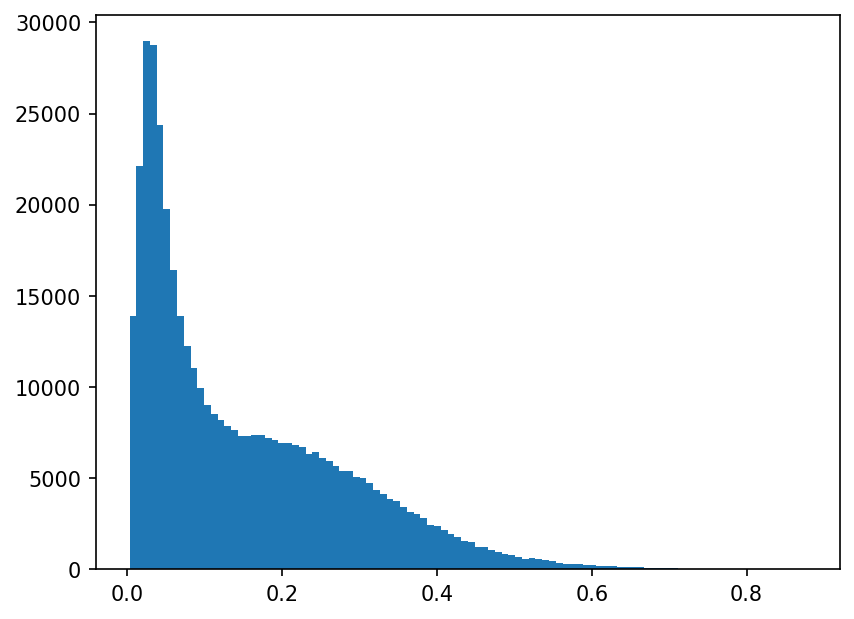

In [35]:
import matplotlib.pyplot as plt
plt.hist(iqr, bins=100)

In [36]:
adata.var['highly_variable'] = False
adata.var.iloc[most_variable_idx[:10000], 0] = True # select the 10k probes with highest inter-quartile range among the samples as 'highly-variable'

In [37]:
adata.obs

,group
X16,EPICYCLE
X1,EPICYCLE
ZH3,EPICYCLE
Ic29,EPICYCLE
Ic35,EPICYCLE
...,...
202292330029_R04C01,PRMS
202292330029_R05C01,PRMS
202292330029_R06C01,PRMS
202292330029_R07C01,PRMS


In [38]:
sc.pp.pca(adata)

... storing 'group' as categorical


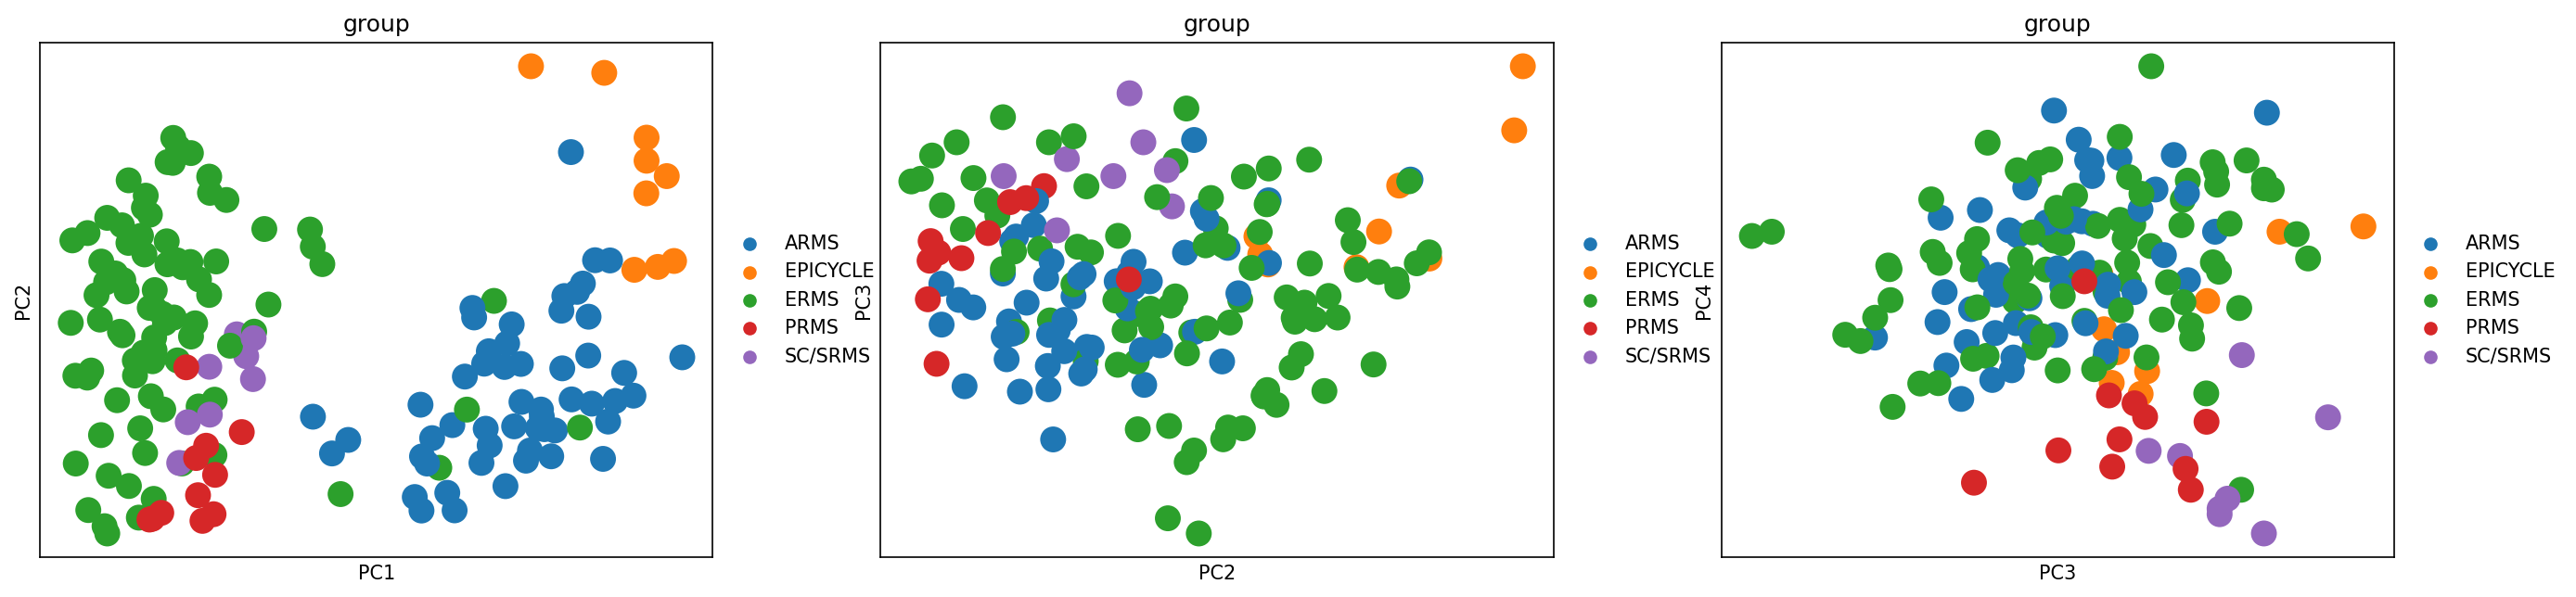

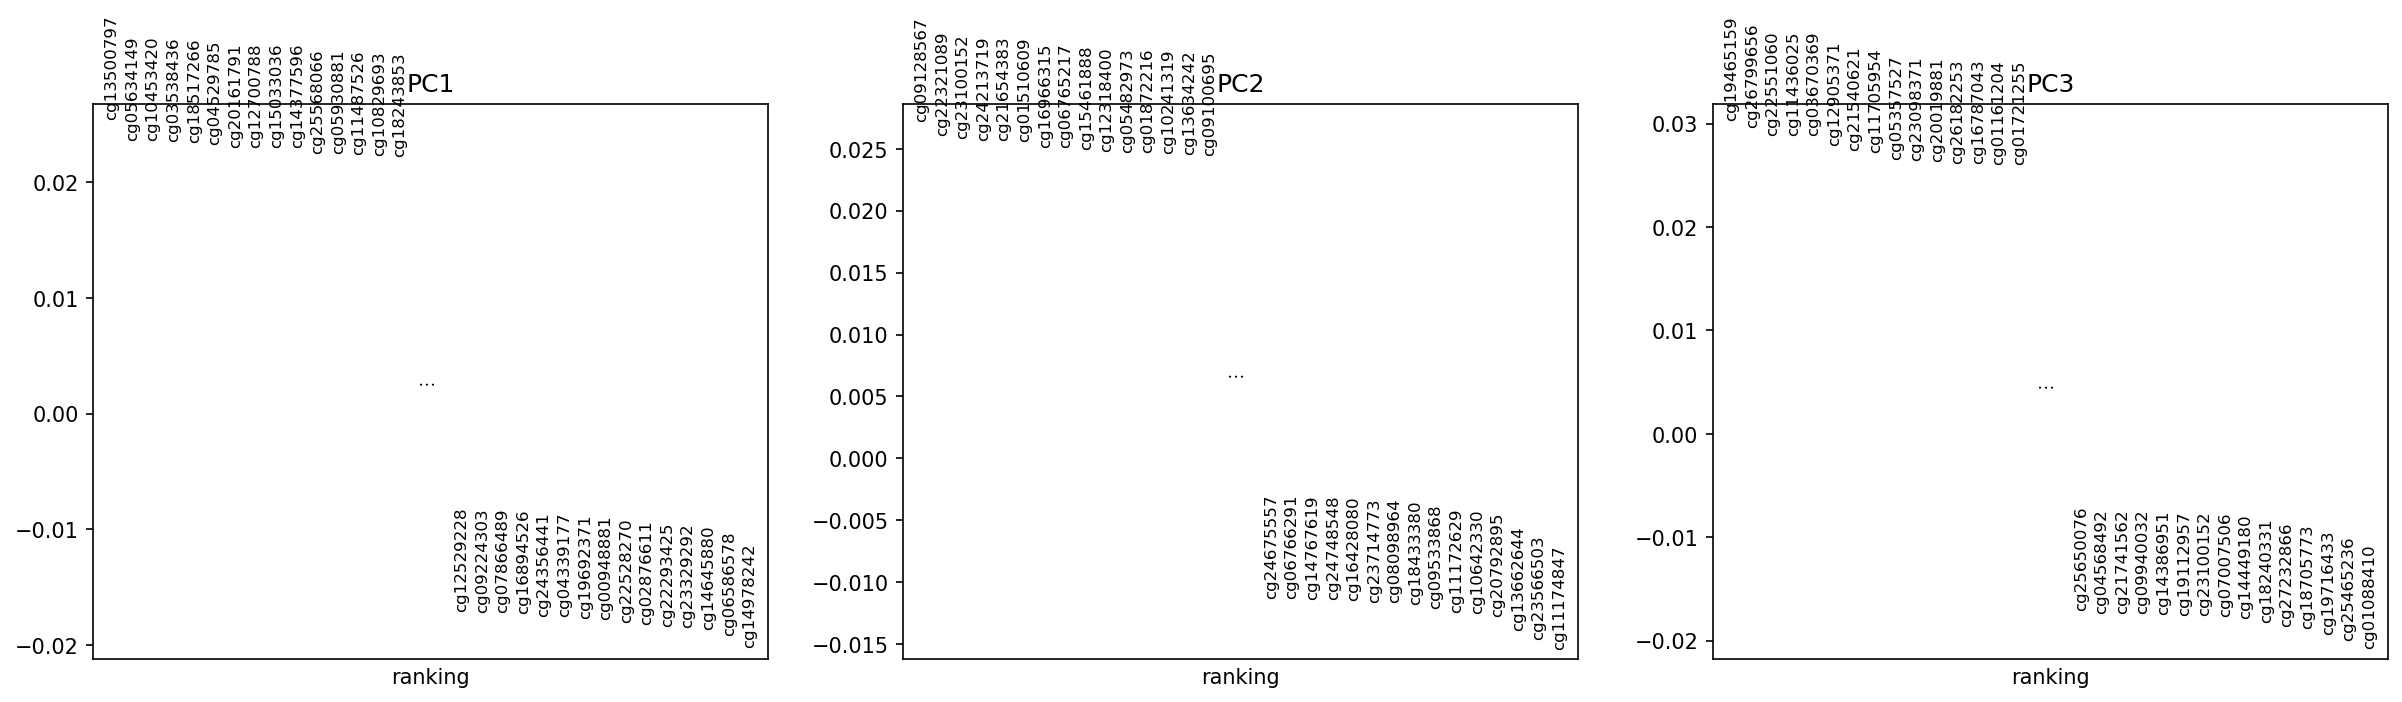

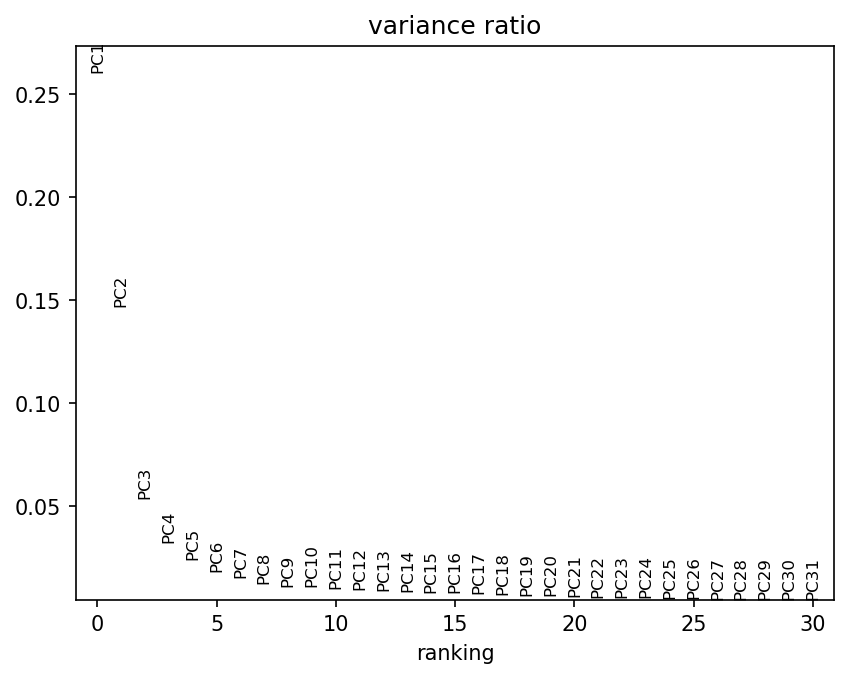

In [39]:
sc.pl.pca_overview(adata, color='group', components=['1,2', '2,3', '3,4'])

In [40]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/marjens/miniconda3/envs/jup/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
#adata.obs['group'] = adata.obs['group'].cat.add_categories("this study").fillna("this study")


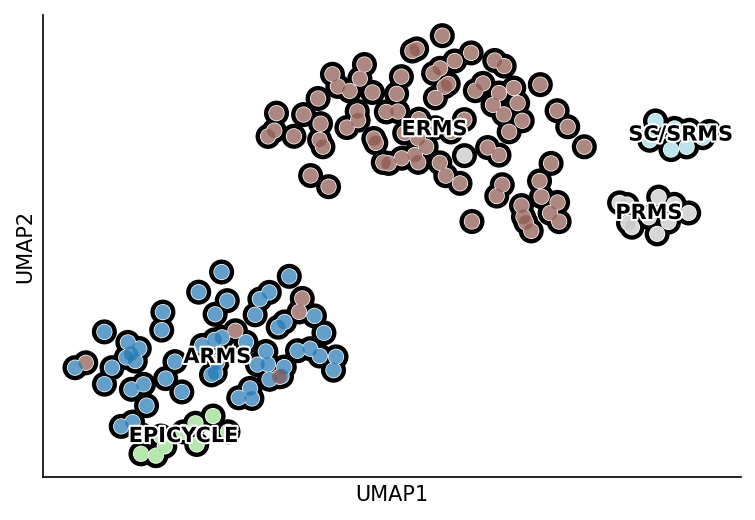

In [42]:
fig, ax = plt.subplots(figsize=(6,4))
sc.pl.umap(adata, color='group', palette='tab20', legend_loc='on data', add_outline=True, size=200, legend_fontoutline=2, ax=ax, show=False)

ax.title.set_text('')
import seaborn as sns
sns.despine(ax=ax)